In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
dataset = pd.read_csv('Exercise-CarData.csv', index_col=[0])
print('Data : \n', dataset)
print('\nData Statistics : \n', dataset.describe())

Data : 
       Price   Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986   Diesel   90       1.0          0  2000  three   
1     13750  23.0  72937   Diesel   90       1.0          0  2000      3   
2     13950  24.0  41711   Diesel   90       NaN          0  2000      3   
3     14950  26.0  48000   Diesel   90       0.0          0  2000      3   
4     13750  30.0  38500   Diesel   90       0.0          0  2000      3   
...     ...   ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300      3   
1432  10845  72.0     ??   Petrol   86       0.0          0  1300      3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300      3   
1434   7250  70.0     ??      NaN   86       1.0          0  1300      3   
1435   6950  76.0      1   Petrol  110       0.0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4  

In [6]:
dataset.dropna(how='all', inplace=True)
print(dataset.dtypes)

new_x = dataset.iloc[:, :-1].values #all rows except last
new_y = dataset.iloc[:, -1,].values  # last column

new_x[:, 3] = new_x[:, 3].astype('str')
le = LabelEncoder()
new_x[:, 3] = le.fit_transform(new_x[:, 3])

print('\nInput before imputation : \n', new_x[6])

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

Input before imputation : 
 [16900 27.0 '??' 1 '????' nan 0 2000 '3']


In [7]:
str_to_num_dictionary={"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10}

#for col-3
for i in range(new_x[:, 3].size):
  if (new_x[i, 2] == "??") :
    new_x[i, 2] = np.nan
  
  if (new_x[i, 4] == "????") :
    new_x[i, 4] = np.nan
  
  temp = str(new_x[i, 8])
  if (temp.isnumeric()) :
    new_x[i, 8] = int(temp)
  else:
    new_x[i, 8] = str_to_num_dictionary[temp]

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

the_imputer = imputer.fit(new_x[:, 0:3]) #fitting the data, function learns the stats
new_x[:, 0:3] = the_imputer.transform(new_x[:, 0:3])

the_mode_imputer = mode_imputer.fit(new_x[:, 3:4]) #fitting the data, function learns the stats
new_x[:, 3:4] = the_mode_imputer.transform(new_x[:, 3:4])

the_imputer = imputer.fit(new_x[:, 4:5]) #fitting the data, function learns the stats
new_x[:, 4:5] = the_imputer.transform(new_x[:, 4:5])

the_mode_imputer = mode_imputer.fit(new_x[:, 5:6])   
new_x[:, 5:6] = the_mode_imputer.transform(new_x[:, 5:6])

print('\nNew Input with Mean Value for NaN : \n', new_x[6])


New Input with Mean Value for NaN : 
 [16900.0 27.0 68647.23997185081 1 101.47832167832168 1.0 0 2000 3]


In [8]:
new_dataset = pd.DataFrame(new_x, columns=dataset.columns[:-1])

new_dataset = new_dataset.astype(float)
new_dataset.dtypes

Price        float64
Age          float64
KM           float64
FuelType     float64
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
dtype: object

             Price       Age        KM  FuelType        HP  MetColor  \
Price     1.000000 -0.845111 -0.565016  0.022730  0.308414  0.100920   
Age      -0.845111  1.000000  0.495199  0.033599 -0.152946 -0.084719   
KM       -0.565016  0.495199  1.000000 -0.356238 -0.332984 -0.088175   
FuelType  0.022730  0.033599 -0.356238  1.000000  0.304205  0.021658   
HP        0.308414 -0.152946 -0.332984  0.304205  1.000000  0.058166   

          Automatic        CC     Doors  
Price      0.033081  0.165067  0.185326  
Age        0.030931 -0.116255 -0.151785  
KM        -0.080743  0.296281 -0.036021  
FuelType   0.073860 -0.499114 -0.018434  
HP         0.013753  0.053466  0.096938  


<AxesSubplot:>

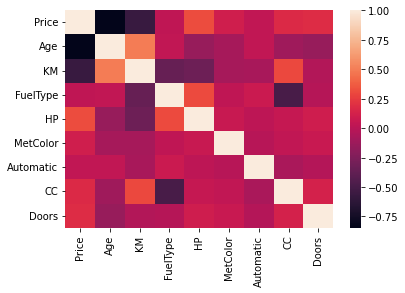

In [9]:
corr = new_dataset.corr()
print(corr.head())
sns.heatmap(corr)

In [11]:
cols = np.full((len(new_dataset.columns), ), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if (corr.iloc[i, j] >= 0.9) :
      if (cols[j]):
        cols[j] = False


selected_cols = new_dataset.columns[cols]
print(selected_cols)

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors'],
      dtype='object')


In [12]:
new_dataset = new_dataset[selected_cols]

In [13]:
new_x = new_dataset.iloc[:, :-1].values

scaler = MinMaxScaler()
std = StandardScaler()
new_x[:, 0:3] = std.fit_transform(scaler.fit_transform(new_x[:, 0:3]))
new_x[:, 4:5] = std.fit_transform(scaler.fit_transform(new_x[:, 4:5]))
new_x[:, 7:9] = std.fit_transform(scaler.fit_transform(new_x[:, 7:9]))

print('\nDataset after preprocessing : \n', new_dataset)


Dataset after preprocessing : 
          Price           Age        KM  FuelType        HP  MetColor  \
0     0.763763 -1.822802e+00 -0.583476       1.0 -0.779131       1.0   
1     0.832715 -1.822802e+00  0.115551       1.0 -0.779131       1.0   
2     0.887877 -1.767012e+00 -0.725566       1.0 -0.779131       1.0   
3     1.163685 -1.655430e+00 -0.556163       1.0 -0.779131       0.0   
4     0.832715 -1.432267e+00 -0.812059       1.0 -0.779131       0.0   
...        ...           ...       ...       ...       ...       ...   
1431 -0.891089 -4.893269e-16 -1.295729       2.0 -1.050645       1.0   
1432  0.031491  9.109418e-01  0.000000       2.0 -1.050645       0.0   
1433 -0.615281 -4.893269e-16 -1.390761       2.0 -1.050645       0.0   
1434 -0.960042  7.993604e-01  0.000000       3.0 -1.050645       1.0   
1435 -1.042784  1.134105e+00 -1.849084       2.0  0.578438       0.0   

      Automatic        CC  Doors  
0           0.0  2.314976    3.0  
1           0.0  2.314976    3.0